In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.deterministic import DeterministicProcess

In [328]:
spy_df = pd.read_csv("spy.csv")
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df.head()

,Date,Open,High,Low,Close,Volume,Day,Week,Weekday
0,1993-01-29,25.236169,25.236169,25.110616,25.218233,1003200,29,4,4
1,1993-02-01,25.236165,25.397591,25.236165,25.397591,480500,1,5,0
2,1993-02-02,25.379652,25.469333,25.325844,25.451397,201300,2,5,1
3,1993-02-03,25.487262,25.738368,25.469326,25.720432,529400,3,5,2
4,1993-02-04,25.810113,25.881857,25.523134,25.828049,531500,4,5,3


In [329]:
spy_df.dropna()


,Date,Open,High,Low,Close,Volume,Day,Week,Weekday
0,1993-01-29,25.236169,25.236169,25.110616,25.218233,1003200,29,4,4
1,1993-02-01,25.236165,25.397591,25.236165,25.397591,480500,1,5,0
2,1993-02-02,25.379652,25.469333,25.325844,25.451397,201300,2,5,1
3,1993-02-03,25.487262,25.738368,25.469326,25.720432,529400,3,5,2
4,1993-02-04,25.810113,25.881857,25.523134,25.828049,531500,4,5,3
...,...,...,...,...,...,...,...,...,...
7555,2023-01-31,401.130005,406.529999,400.769989,406.480011,86811800,31,5,1
7556,2023-02-01,405.209991,413.670013,402.350006,410.799988,101459200,1,5,2
7557,2023-02-02,414.859985,418.309998,412.880005,416.779999,101654500,2,5,3
7558,2023-02-03,411.589996,416.970001,411.089996,412.350006,94647400,3,5,4


In [330]:
y = spy_df['Close']
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()

In [331]:
model = LinearRegression()

In [332]:
model.fit(X,y)

LinearRegression()

In [333]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [334]:
spy_df = pd.concat([X, y_pred.rename('y_pred')], axis=1)

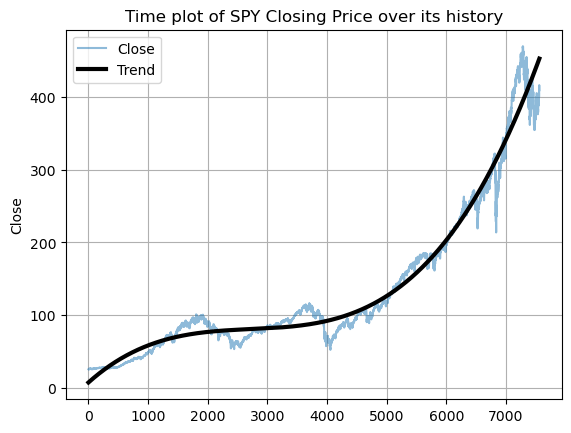

In [335]:
ax = y.plot(alpha=0.5, title="Time plot of SPY Closing Price over its history", ylabel="Close")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='Black')
ax.legend()
ax.grid(True)

In [336]:
model.score(X,y)

0.9709195000333578

In [345]:
# 6 months
future = dp.out_of_sample(steps=130)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

7685    482.267152
7686    482.502541
7687    482.738023
7688    482.973598
7689    483.209267
dtype: float64

In [338]:
# 1 year 
future = dp.out_of_sample(steps=260)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

7819    514.64856
dtype: float64

In [339]:
# 5 years
future = dp.out_of_sample(steps=1300)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

8859    827.96084
dtype: float64

In [340]:
# 10 years
future = dp.out_of_sample(steps=2600)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

10159    1397.656428
dtype: float64

In [341]:
# 15 years
future = dp.out_of_sample(steps=3900)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

11459    2203.76962
dtype: float64

In [342]:
# 20 years
future = dp.out_of_sample(steps=5200)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

12759    3287.634472
dtype: float64

In [343]:
# 40 years
future = dp.out_of_sample(steps=10400)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

17959    11227.291589
dtype: float64

In [344]:
# # 22 days 
# future = dp.out_of_sample(steps=22)
# y_future = pd.Series(model.predict(future), index=future.index)
# y_future.tail(1)

7581    458.292899
dtype: float64